# Pkg Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Setting up  Environments 

In [2]:
sns.set(style='darkgrid', context='talk', palette='rainbow', font_scale=.75)
palette = sns.color_palette("rocket")
sns.set_palette(palette)

### loading Dataset ...

In [3]:
dataset_url='https://archive.ics.uci.edu/static/public/165/data.csv'

dataframe = pd.read_csv(dataset_url)

dataframe.columns = [str(col).strip() for col in dataframe.columns]

dataframe.rename(columns={'Concrete compressive strength': 'Strength'}, inplace=True)

print(f'Dtaset Size {dataframe.shape}, Row count {dataframe.shape[0]} , feature count {dataframe.shape[1]}')

dataframe.head()

Dtaset Size (1030, 9), Row count 1030 , feature count 9


Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30

### Null Analysis

In [4]:
dataframe.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

### Duplicate Analysis

In [5]:
dup_data = dataframe[dataframe.duplicated(keep='first')]
print(f'Duplicate Count {dup_data.shape[0]}')
if not dup_data.empty:
    dataframe.drop_duplicates(keep='first', inplace=True)
    dup_data = dataframe[dataframe.duplicated(keep='first')]
    print(f'Duplicate Count after Duplicate Remover {dup_data.shape[0]}')



Duplicate Count 25
Duplicate Count after Duplicate Remover 0


### Data visualization 


### Univariate Analysis

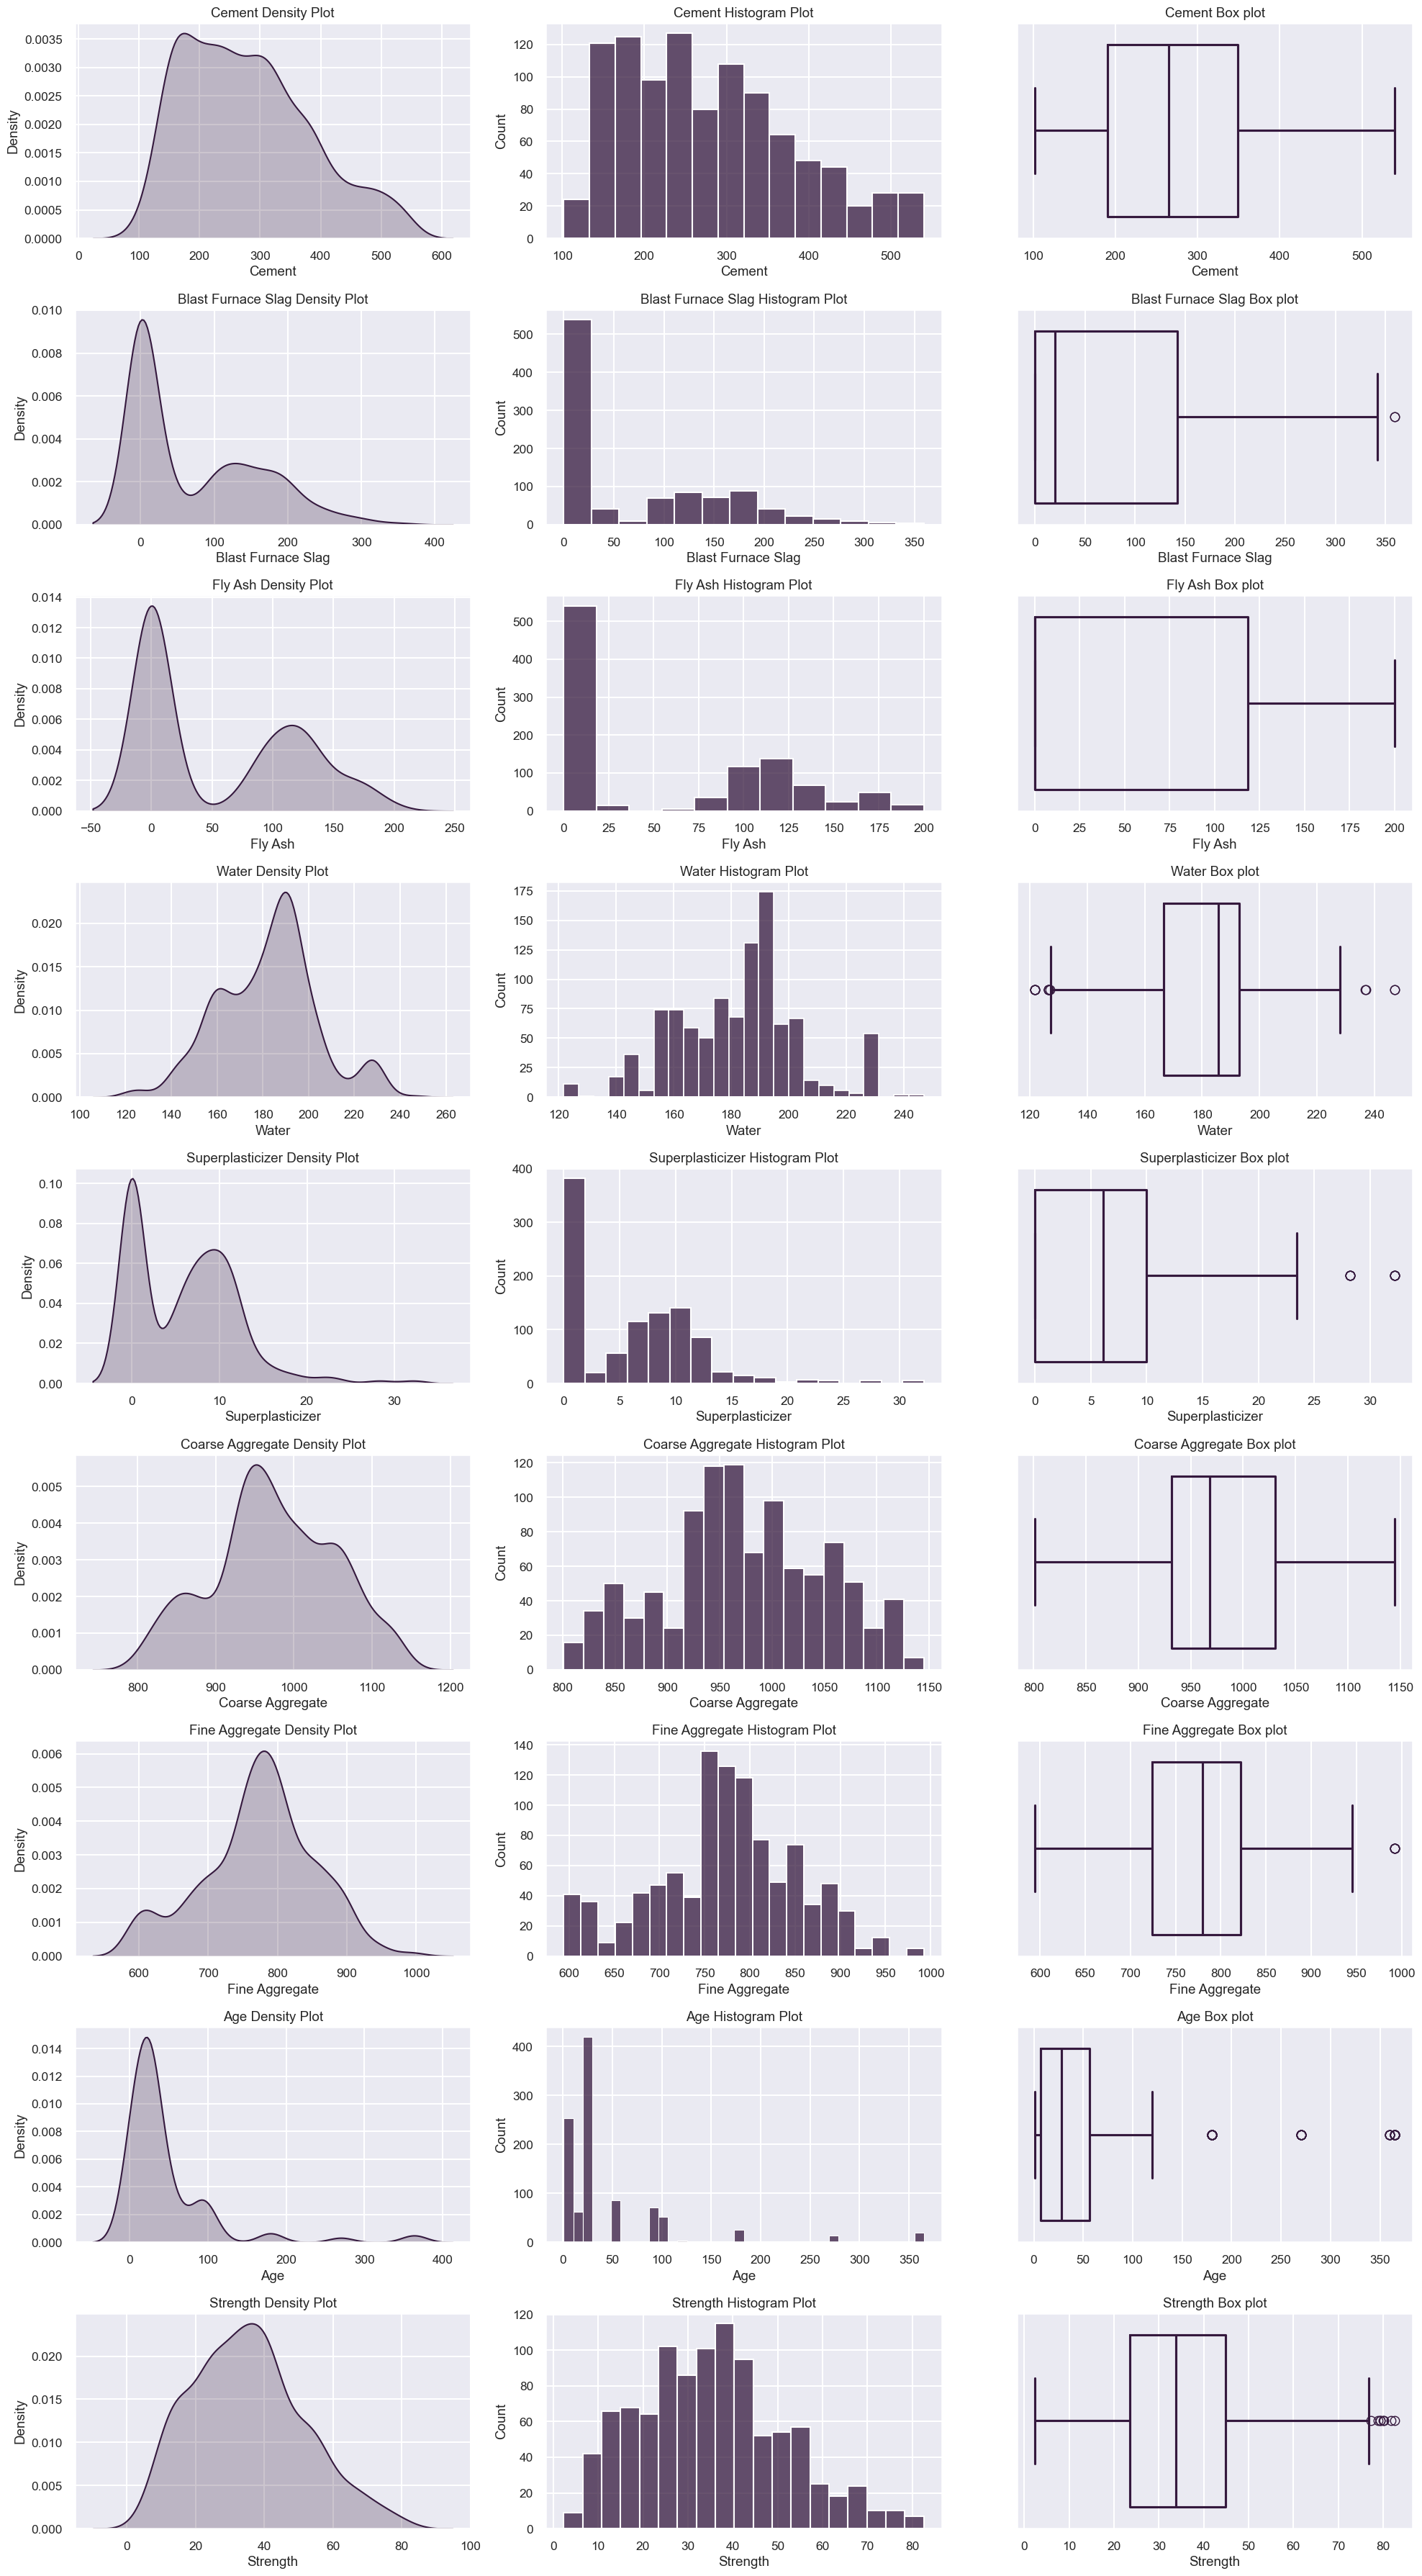

In [6]:
n_columns = dataframe.shape[1]
fig, axes = plt.subplots(nrows=n_columns, ncols=3, figsize=(20, 4* n_columns))

for col_idx, column in enumerate(dataframe.columns):
    sns.kdeplot(x=column, data=dataframe,fill=True, ax=axes[col_idx][0])
    axes[col_idx][0].set_title(f"{column} Density Plot")

    sns.histplot(x=column, data=dataframe, ax=axes[col_idx][1])
    axes[col_idx][1].set_title(f"{column} Histogram Plot")


    sns.boxplot( x=column, data=dataframe,fill=False, ax=axes[col_idx][2])
    axes[col_idx][2].set_title(f"{column} Box plot")

plt.tight_layout()
plt.show()


### Bivariate Analysis

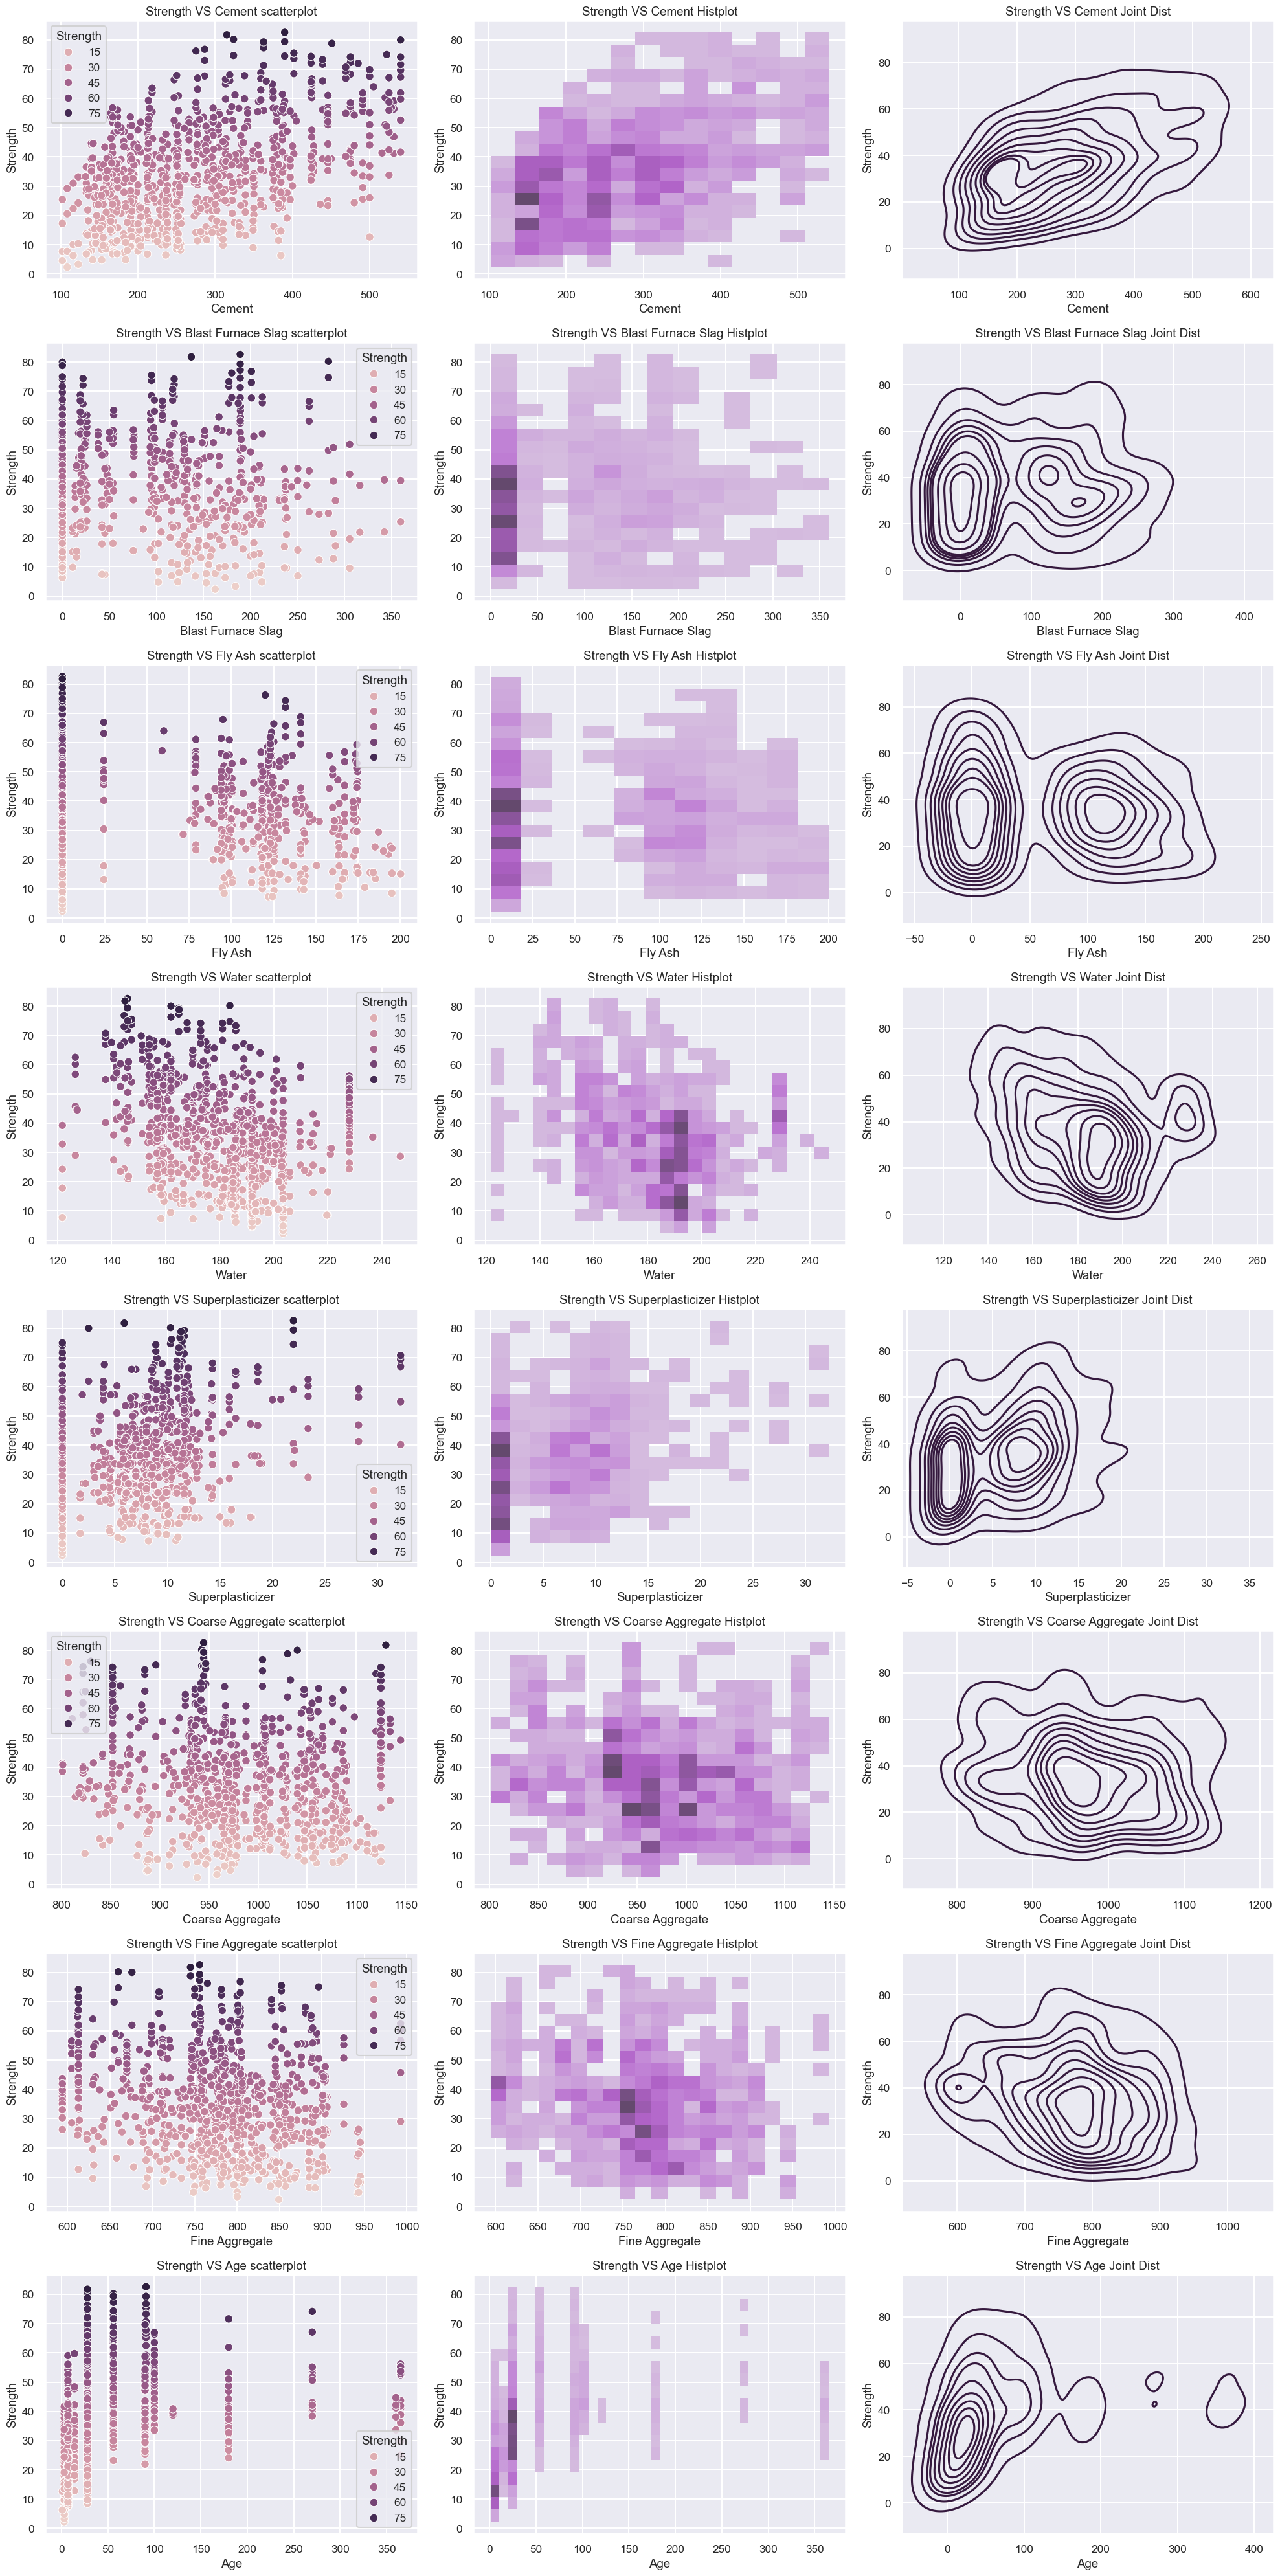

In [7]:
n_feature = dataframe.shape[1] - 1
fig, axes = plt.subplots(nrows=n_feature, ncols=3, figsize=(20, 5* n_feature))

target_col = 'Strength'

for col_idx, column in enumerate(dataframe.columns):
    if column == target_col:
        continue

    # sns.rugplot(y=target_col, x=column, data=dataframe, ax=axes[col_idx][0])
    sns.scatterplot(y=target_col, x=column, data=dataframe, hue=target_col, ax=axes[col_idx][0])
    axes[col_idx][0].set_title(f"{target_col} VS {column} scatterplot")

    sns.histplot(dataframe, x=column, y=target_col, ax=axes[col_idx][1] )
    axes[col_idx][1].set_title(f"{target_col} VS {column} Histplot")

    sns.kdeplot(dataframe, x=column, y=target_col, ax=axes[col_idx][2])
    axes[col_idx][2].set_title(f"{target_col} VS {column} Joint Dist")

plt.tight_layout()
plt.show()

# Correlation Matrix

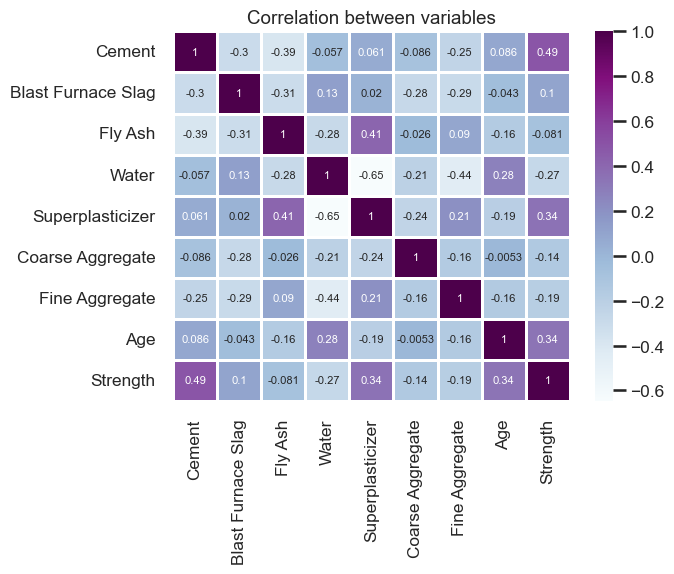

In [8]:

sns.heatmap(dataframe.corr(), annot=True, linewidth=2, cmap="BuPu", annot_kws={"size": 8})
plt.title("Correlation between variables")
plt.show()


C:\Users\rdas6\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


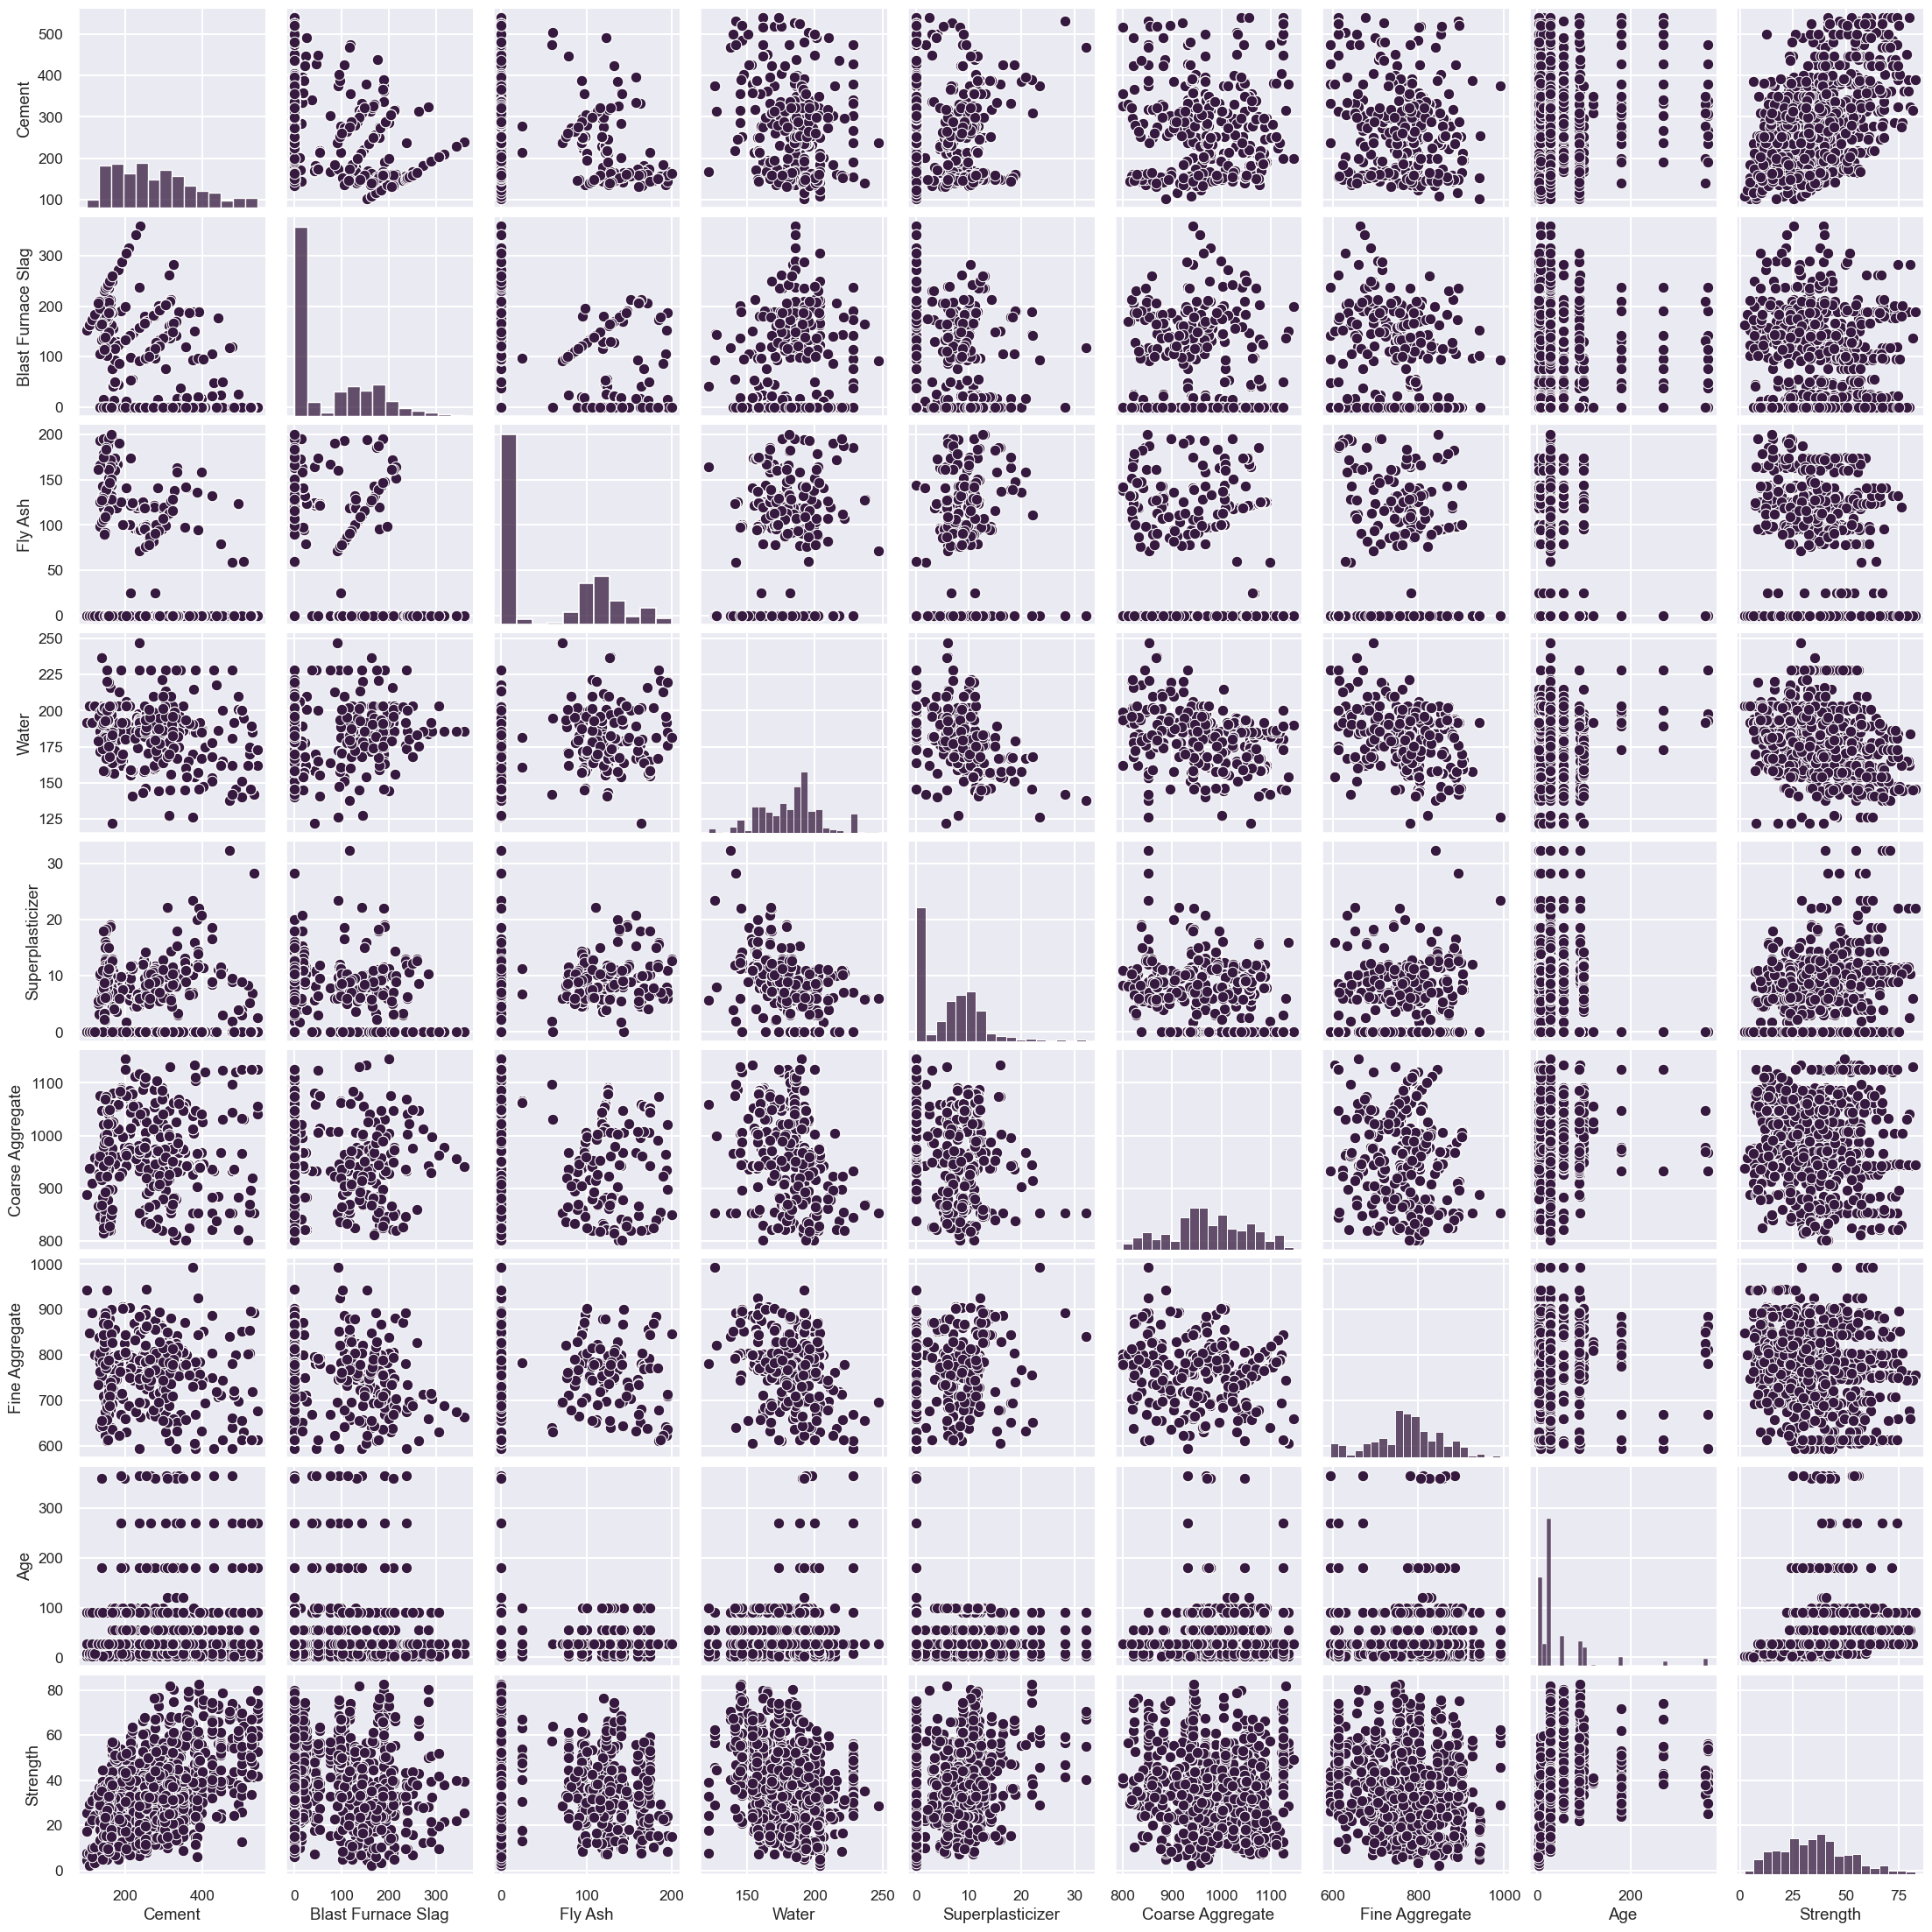

In [9]:
sns.pairplot(dataframe)

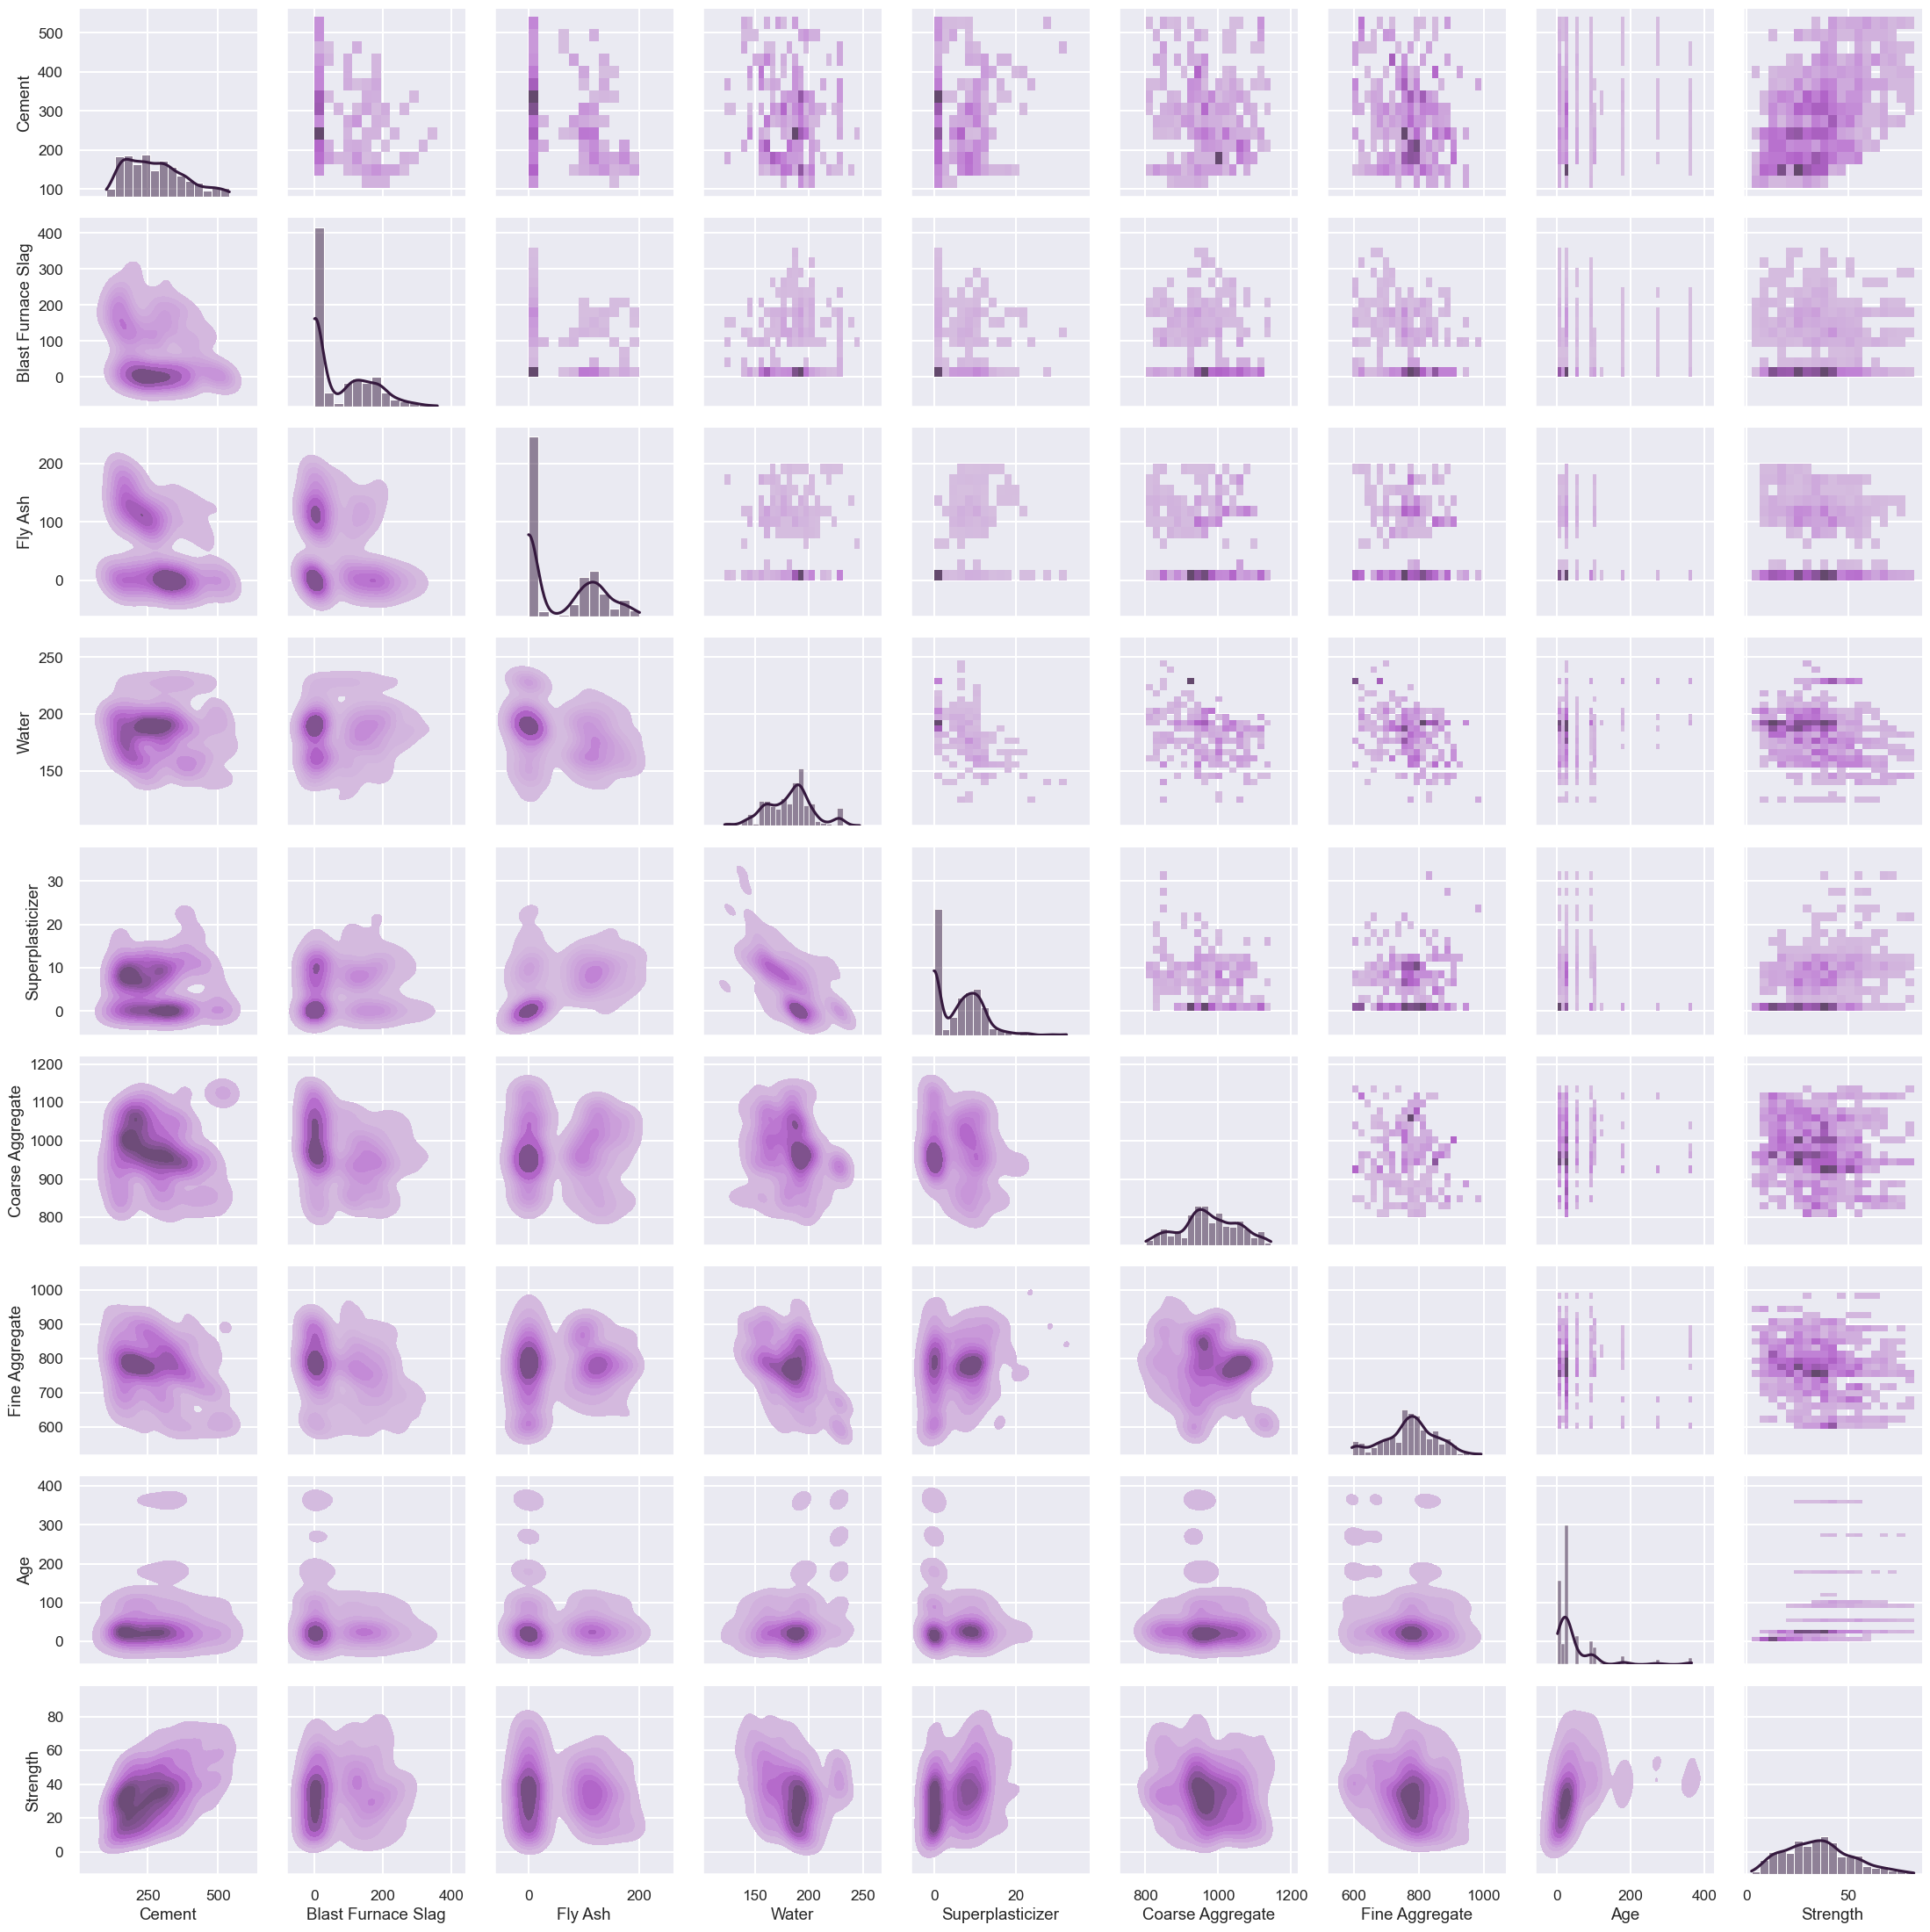

In [10]:
g = sns.PairGrid(dataframe)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)